In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows
display(df.head())

# Display column names and their data types
display(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [2]:
# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the first few rows of the selected features
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


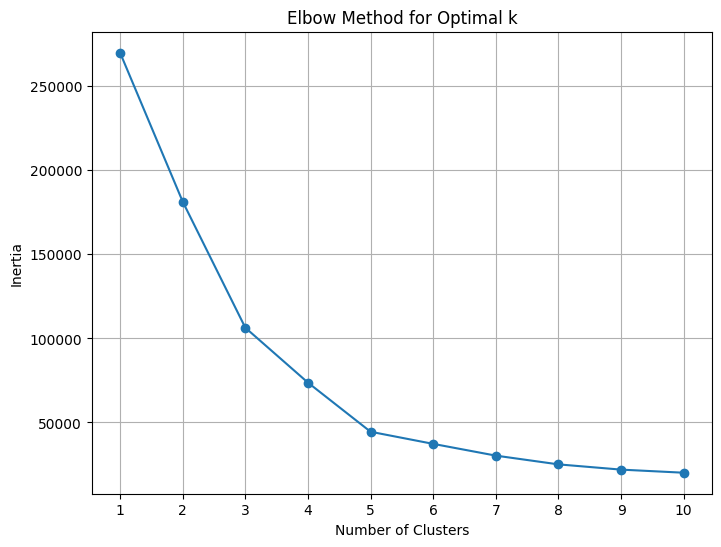

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store inertia values
inertia = []

# Loop through a range of possible numbers of clusters
for k in range(1, 11):
    # Instantiate KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the KMeans model to the data
    kmeans.fit(X)

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [4]:
# Instantiate KMeans with the optimal number of clusters (k=5 based on the Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the KMeans model to the data
kmeans.fit(X)

# Store the cluster labels in a new column in the original DataFrame
df['cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with the new 'cluster' column
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


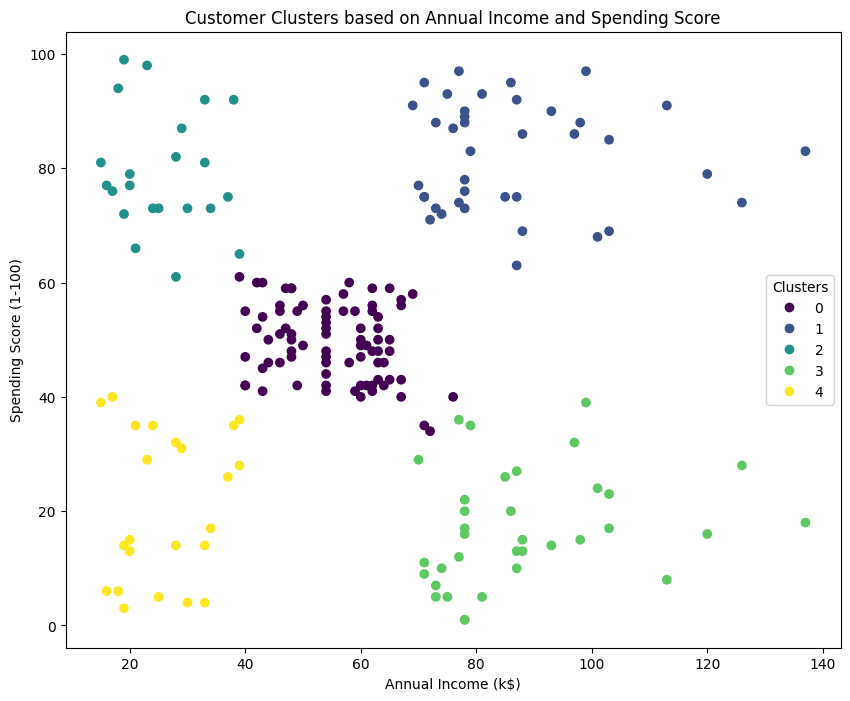

In [6]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', label=df['cluster'])

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters based on Annual Income and Spending Score')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

# Display the plot
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, df['cluster'])

# Print the Silhouette Score
print(f"The average Silhouette Score is: {silhouette_avg}")

The average Silhouette Score is: 0.553931997444648


## Summary:

*   The dataset contains 200 entries and 5 columns: 'CustomerID', 'Gender', 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)'. There are no missing values.
*   The Elbow Method indicated that 5 is a suitable number of clusters for the customer data based on 'Annual Income (k\$)' and 'Spending Score (1-100)'.
*   K-Means clustering successfully segmented the customers into 5 distinct groups based on their annual income and spending score.
*   The visualization clearly shows these 5 clusters as separate groups on a scatter plot of annual income versus spending score.
*   The average Silhouette Score for the clustering is approximately 0.554, indicating a reasonably good separation of the clusters.
